## Tutorial 1 - Accessing biodiveristy data through web services
In this tutorial we will go through some different functions related to downloading biodiveristy data, mostly from GBIF. The point of this tutproal is to provide you the tools to properly download such data in publication quality (DOI-assigned and thus tracable) and to provide you with some handy plotting functions to display the downloaded data.

### 1. Install and load the `rgbif` package

In [32]:
#install.packages('rgbif')
library(rgbif)

### 2. Define taxonomy
Taxonomy can be a tricky topic. Several different names exist for many taxa, variations being caused by misspellings, different synonyms and regional common names for species. If one wants to extract all records for a certain taxon, one first needs to define a coherent taxonomy and in the worst case needs to sync all available datasets to this chosen taxonomy. This can be a rabit-hole that can make the collection of large datasets from public databases very time consuming. Luckily GBIF is working with one consistent taxonomy, which most records are assigned to. In this tutorial we will work with this GBIF backbone taxonomy (NUB). Check out the [description of the GBIF taxonomy](https://www.gbif.org/dataset/d7dddbf4-2cf0-4f39-9b2a-bb099caae36c#description) to understand how this taxonomy is derived and how to cite it.

The following identifier points to the NUB taxonomy:

In [33]:
nub <- 'd7dddbf4-2cf0-4f39-9b2a-bb099caae36c'

### 3. Pick a species/genus/family

**Pick your own species, genus, or family of interest**, for which you want to extract occurrence data from GBIF. If you are feeling sufficiently familiar with R, go ahead and extract occurrence data for multiple taxa, which at the end will yield the most interesting results when plotting the data.

In this tutorial we will use an example species but it's strongly encouraged for you to go through the exercise with your own picked taxon (doens't have to be a species, can be a smaller or larger taxonomic entity).

In [34]:
taxon_name <- "Turdus merula"

There is a useful search function in `rgbif` called `name_suggest()`. This will return any matches with your provided taxon name and return the name as well as the taxonomic rank of the match:

In [35]:
name_suggest(q=taxon_name)

key,canonicalName,rank
2490719,Turdus merula,SPECIES
8917151,Turdus merula mallorcae,SUBSPECIES
6094902,Turdus merula mandarinus,SUBSPECIES
6094954,Turdus merula cabrerae,SUBSPECIES
6094911,Turdus merula sowerbyi,SUBSPECIES
9173280,Turdus merula nigropileus,SUBSPECIES
6094935,Turdus merula syriacus,SUBSPECIES
6094940,Turdus merula aterrimus,SUBSPECIES
6094947,Turdus merula mauritanicus,SUBSPECIES
5846244,Turdus merula intermedius,SUBSPECIES


### 4. Check taxonomic information

Now we use the `name_lookup()` function of the `rgbif` package to check if our picked taxon exists in the chosen GBIF backbone taxonomy and what information is stored with it.

In order for the function to find our taxon in the taxonomy, we need to provide the rank that the taxon name represents (is it a subspecies, species, genus, or family name?). We can extract the correct rank classification from the results of the `name_suggest()` function as shown above. In this example we're working with a taxon name that is on the species level. Accepted ranks are:

`CLASS, CULTIVAR, CULTIVAR_GROUP, DOMAIN, FAMILY, FORM, GENUS, INFORMAL, INFRAGENERIC_NAME, INFRAORDER, INFRASPECIFIC_NAME, INFRASUBSPECIFIC_NAME, KINGDOM, ORDER, PHYLUM, SECTION, SERIES, SPECIES, STRAIN, SUBCLASS, SUBFAMILY, SUBFORM, SUBGENUS, SUBKINGDOM, SUBORDER, SUBPHYLUM, SUBSECTION, SUBSERIES, SUBSPECIES, SUBTRIBE, SUBVARIETY, SUPERCLASS, SUPERFAMILY, SUPERORDER, SUPERPHYLUM, SUPRAGENERIC_NAME, TRIBE, UNRANKED, VARIETY`

If you are uncertain about how to parse your taxon name into this function, check the helpfunction by executing `?name_lookup()` in R.

In [36]:
rank = 'species'
taxon_taxonomy_data = name_lookup(query=taxon_name, rank=rank, datasetKey=nub, limit=1)
taxon_taxonomy_data

$meta
# A tibble: 1 x 4
  offset limit endOfRecords count
   <int> <int> <lgl>        <int>
1      0     1 FALSE           14

$data
# A tibble: 1 x 35
     key scientificName datasetKey constituentKey nubKey parentKey parent
   <int> <chr>          <chr>      <chr>           <int>     <int> <chr> 
1 2.49e6 Turdus merula… d7dddbf4-… 7ddf754f-d193… 2.49e6   2490714 Turdus
# ... with 28 more variables: kingdom <chr>, phylum <chr>, order <chr>,
#   family <chr>, genus <chr>, species <chr>, kingdomKey <int>,
#   phylumKey <int>, classKey <int>, orderKey <int>, familyKey <int>,
#   genusKey <int>, speciesKey <int>, canonicalName <chr>, authorship <chr>,
#   publishedIn <chr>, nameType <chr>, taxonomicStatus <chr>, rank <chr>,
#   origin <chr>, numDescendants <int>, numOccurrences <int>, extinct <lgl>,
#   habitats <chr>, nomenclaturalStatus <lgl>, threatStatuses <chr>,
#   synonym <lgl>, class <chr>

$facets
NULL

$hierarchies
$hierarchies$`2490719`
  rankkey          name
1       1      Animalia
2      44      Chordata
3     212          Aves
4     729 Passeriformes
5    9322  Muscicapidae
6 2490714        Turdus


$names
$names$`2490719`
                          vernacularName language
1                       Common Blackbird      eng
2                     Eurasian Blackbird      eng
3                             Merle noir      fra
4                       Common Blackbird      eng
5                     Eurasian Blackbird      eng
6                             merle noir      fra
7                              blackbird      eng
8                       Common Blackbird      eng
9                     Eurasian Blackbird      eng
10                            Merle noir      fra
11                    Eurasian Blackbird      eng
12 Eurasian Blackbird / Common Blackbird      eng
13                                 Amsel      deu
14                      Common Blackbird      eng
15                                 Merel      nld
16                            Merle noir      fra
17                                 Merlo      ita
18                           Mirlo Común      spa
19                               Solsort      dan
20                            Svarttrost      nor
21                          drozd čierny      slk
22                           fekete rigó      hun
23                     juodasis strazdas      lit
24                              koltrast      swe
25                                   kos      slv
26                       kos (zwyczajny)      pol
27                             kos černý      ces
28                   melnais mežastrazds      lav
29                                 melro      por
30                                 merla      cat
31                           mustarastas      fin
32                            musträstas      est
33                          Чёрный дрозд      rus
34                                  乌鸫      zho
35                                  烏鶇      zho
36                                 Amsel         
37                    Eurasian blackbird         
38                             blackbird         
39                               Solsort      dan
40                      common blackbird      eng
41                                 Amsel      deu
42                             Blackbird      eng
43                           Mirlo Común      spa
44                           Mustarastas      fin
45                            Merle noir      fra
46                           Fekete rigó      hun
47                                 Merlo      ita
48                                 Merel      nld
49                                   Kos      pol
50                           Melro-preto      por
51                              Koltrast      swe
52                                 Amsel      deu
53                             blackbird      eng
54                                 merel      nld
55                            merle noir      fra
56                                 Merel      nld
5

You can see there is a lot of useful data stored in this taxonomy. First we can extract the **numerical taxon id** which we will use in following steps to extract occurrence records for this taxon. The advatange of using a numerical id is that the taxon is unmistakenly defined and will not anymore be subject to misspellings and different synonyms from here on.

In [37]:
taxon_id = taxon_taxonomy_data$data$key
taxon_id

[1] 2490719

The `name_lookup()` function also provides us the taxon ids of the encompassing taxa higher up in the taxonomic hierarchy. In this example it tells us that the common cuckoo belongs to the genus `Cuculus` in the family `Cuculidae` etc.

In [38]:
taxon_taxonomy_data$hierarchies

rankkey,name
1,Animalia
44,Chordata
212,Aves
729,Passeriformes
9322,Muscicapidae
2490714,Turdus


In case you're only working with a singular species (as in the example so far), store the ID of the encompassing genus, which we will use later to plot occurrences of multiple species:

In [39]:
genus_ID = taxon_taxonomy_data$hierarchies[[1]][length(taxon_taxonomy_data$hierarchies[[1]]$name),]$rankkey

We can even retrieve a list of **popular names (vernacular names)** in different languages for our taxon. This list might come in handy if we are to combine the GBIF occurrence data with data from other data-sources, which may not have adopted the same taxonomy. In that case we could search for any matches with this list of vernacular names.

In [40]:
c(taxon_taxonomy_data$names[[1]][1])

$vernacularName
 [1] Common Blackbird                      Eurasian Blackbird                   
 [3] Merle noir                            Common Blackbird                     
 [5] Eurasian Blackbird                    merle noir                           
 [7] blackbird                             Common Blackbird                     
 [9] Eurasian Blackbird                    Merle noir                           
[11] Eurasian Blackbird                    Eurasian Blackbird / Common Blackbird
[13] Amsel                                 Common Blackbird                     
[15] Merel                                 Merle noir                           
[17] Merlo                                 Mirlo Común                          
[19] Solsort                               Svarttrost                           
[21] drozd čierny                          fekete rigó                          
[23] juodasis strazdas                     koltrast                             
[25] kos                                   kos (zwyczajny)                      
[27] kos černý                             melnais mežastrazds                  
[29] melro                                 merla                                
[31] mustarastas                           musträstas                           
[33] Чёрный дрозд                          乌鸫                                 
[35] 烏鶇                                  Amsel                                
[37] Eurasian blackbird                    blackbird                            
[39] Solsort                               common blackbird                     
[41] Amsel                                 Blackbird                            
[43] Mirlo Común                           Mustarastas                          
[45] Merle noir                            Fekete rigó                          
[47] Merlo                                 Merel                                
[49] Kos                                   Melro-preto                          
[51] Koltrast                              Amsel                                
[53] blackbird                             merel                                
[55] merle noir                            Merel                                
[57] Amsel                                 Common Blackbird                     
[59] Amsel                                 common blackbird                     
[61] karatavuk                             merel                                
[63] merle noir                            mulleja                              
[65] mullija                               mullizeza                            
[67] mwyalchen                             mëllënja                             
[69] qofka e murrme                        qukla                                
[71] svarttrost                            Κοινός Κότσυφας                      
[73] Кос                                   Common Blackbird                     
[75] Eurasian Blackbird                    merle noir                           
47 Levels: Common Blackbird Eurasian Blackbird Merle noir ... Кос

### 5. Download occurrence data


Now we have determined our species ID and can proceed downloading occurrence data. Downloading occurrence data from GBIF can be done using the `occ_search()` function of the `rgbif` package.

Before we start downloading, it is usually a good idea to check first how many occurrences will be downloaded. In general it takes quite a while to download hundreds of thousands of records, while a few thousand up to tens of thousands might be feasible for this exercise. In order to get a count of matches, we only download the metadata of our search (instead of the actual data) by setting `return = 'meta'`. We then call the count value from the exported metadata:

In [41]:
library(rgbif)
occ_search(taxonKey=taxon_id, hasCoordinate = TRUE, return =  "meta")$count

[1] 4043095

If you want to search for a specific locality/region/country, there are several flags that can be used to restrict the search geographically. Some examples are:

`locality = c("Gothenburg", "Göteborg")`

`continent = 'europe'`

`country = 'SE'`

For example, this will only give us records from Sweden (`country = 'SE'`):

In [42]:
occ_search(taxonKey=taxon_id, hasCoordinate = TRUE, return =  "meta",country = 'SE')$count

[1] 640961

If your count of datapoints is higher than 20,000 you probably want to set a limit to the number of occurrences to be downloaded, since it will otherwise take a very long time. You can set a download limit in the `occ_search()` function, using the `limit=NUM` flag, where `NUM` is hte number of records you want to export. For our purposes, let's set this number to 5,000. Downloading this many records may take a minute. If your taxon of choice doesn't have that many records, it will donwload as many records as there are and it might thus be finished a lot faster.

In [43]:
records <- occ_search(taxonKey=taxon_id, return="data", hasCoordinate=TRUE, limit=5000,country = 'SE') 

Clean the resulting species names, ensuring binomial name:

In [44]:
lst = strsplit(records$scientificName, ' ')
species_names = paste(lapply(lst, "[[", 1),lapply(lst, "[[", 2))
records$scientificNameCorrected = species_names

### 6. Plot the occurrence data

Extract the coordinates from all occurrence points and turn them into a spatial points object:

In [45]:
library(sp)

lon = records$decimalLongitude
lat = records$decimalLatitude
locations = cbind(lon, lat)

locations_spatial <- SpatialPoints(locations)

Now let's load a world map to plot our points on. Using the `ggplot::borders()` function, we can very easily load a world map with the following command:

In [46]:
library(ggplot2)
map_world <- borders(database = "world", colour = "gray50", fill = "#383838")

It is usually a good idea to **crop the world map** to the area where our points are occurring. So let's first define the counding box to plot by finding the min and max geographic extent of our data, plus some additional buffer, so that points are not at the edges of the plot:

In [47]:
xmin<-min(records$decimalLongitude)
xmax<-max(records$decimalLongitude)
ymin<-min(records$decimalLatitude)
ymax<-max(records$decimalLatitude)
buff<-1

Now let's plot our points on the map, colored by species name.

We will plot using the `ggplot()` function. The logic of the `ggplot` syntax is accumulative. That means you can add additonal layers/settigns to the command by adding lines connnected with a `+` sign.

First we just call the function `ggplot()`, then tell it to plot our `map_world` object we created above, then add the data points (`records`) using the `geom_point()` function, then crop the map around the borders (`xmin,xmax,ymin,ymax`) defined in the previous step (based on the spread of the data), and finally we add a legend using the `theme()` command.

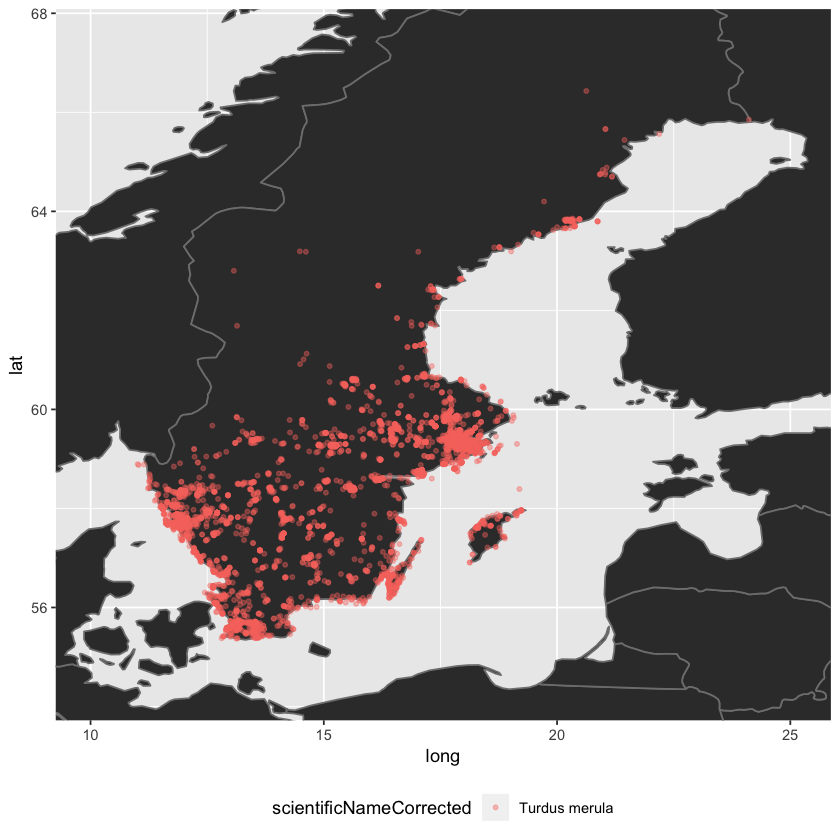

In [48]:
ggplot() +
map_world +
geom_point(data = records,  # Specify the data for geom_point()
             aes(x = decimalLongitude,  # Specify the x axis as longitude
                 y = decimalLatitude,
                 colour = scientificNameCorrected),  # Colour the points based on species name
             alpha = 0.4,  # Set point opacity to 40%
             size = 1) +
coord_cartesian(xlim = c((xmin-buff),(xmax+buff)), ylim = c((ymin-buff),(ymax+buff))) +
theme(legend.position = "bottom")

### 7. Citing the source data

If you want to be very thorough in your citations, you can export all citations of the data that are present in your downloaded dataframe (called `records` in this example). You can easily retrieve this information using the `gbif_citation()` function:

In [101]:
gbif_citation(records)

[[1]]
<<rgbif citation>>
   Citation: iNaturalist.org (2019). iNaturalist Research-grade Observations.
        Occurrence dataset https://doi.org/10.15468/ab3s5x accessed via
        GBIF.org on 2019-04-29.. Accessed from R via rgbif
        (https://github.com/ropensci/rgbif) on 2019-04-29
   Rights:

[[2]]
<<rgbif citation>>
   Citation: Shah M, Coulson S (2019). Artportalen (Swedish Species Observation
        System). Version 92.144. ArtDatabanken. Occurrence dataset
        https://doi.org/10.15468/kllkyl accessed via GBIF.org on 2019-04-29..
        Accessed from R via rgbif (https://github.com/ropensci/rgbif) on
        2019-04-29
   Rights:

[[3]]
<<rgbif citation>>
   Citation: Levatich T, Padilla F (2019). EOD - eBird Observation Dataset.
        Cornell Lab of Ornithology. Occurrence dataset
        https://doi.org/10.15468/aomfnb accessed via GBIF.org on 2019-04-29..
        Accessed from R via rgbif (https://github.com/ropensci/rgbif) on
        2019-04-29
   Rights:


Alternatively/additionally you can create your own official download request at GBIF, which will assign a DOI to your download that can (and should) be cited when publishing such data. The advantage is that everybody can access the donwload and (hopefully) reproduce your operations on the data.

### 8. Create DOI-assigned download

First you need to create a user account at GBIF. This is very simple and fast, just follow this link:
[https://www.gbif.org/user/profile](https://www.gbif.org/user/profile). Once you created your account and activated it via email, you can copy the lines below and replace the values `USERNAME`, `PASSWORD`, and `EMAIL` with your account name, passwors, and email address, respectively. You only need to do this once in this session. From here on out the `rgbif` package will remember your user data, but you'll have to enter them again when you restart R next time.

In [106]:
options(gbif_user='USERNAME')
options(gbif_pwd='PASSWORD')
options(gbif_email='EMAIL')

Now let's create a download request for all occurrences associated with your chosen taxon. For this you can use the `occ_download()` command where you provide the `taxonKey` and specify that you want only records with coordinates (`hasCoordinate`). The `type="and"` flag means that both of these requirements have to be fulfilled (i.e. the taxonId needs to match **and** the records must have coordinates assigned to it).

In [144]:
# Get download key
request = occ_download(paste0('taxonKey =',taxon_id),'hasCoordinate = TRUE',type = "and")
request

<<gbif download>>
  Username: tobiashofmann
  E-mail: tobiashofmann@gmx.net
  Download key: 0006270-190415153152247

You can get more information about your download request by using the `occ_download_meta()` function or by logging into your gbif user account and checking the [download section](https://www.gbif.org/user/download): 

In [153]:
download_key = occ_download_meta(request[1])
download_key

<<gbif download metadata>>
  Status: SUCCEEDED
  Format: DWCA
  Download key: 0006240-190415153152247
  Created: 2019-04-29T19:23:01.221+0000
  Modified: 2019-04-29T19:51:58.526+0000
  Download link: http://api.gbif.org/v1/occurrence/download/request/0006240-190415153152247.zip
  Total records: 4043095
  Request: 
    type:  and
    predicates: 
      > type: equals, key: TAXON_KEY, value: 2490719
      > type: equals, key: HAS_COORDINATE, value: TRUE

It will take 10-20 minutes (depending on the number of records in your query) for this download request to finish compiling. Once the `Status:` field says `SUCCEEDED` you are ready to retrieve your data. You can do this through R using the `occ_download_get()` function, or you can instead manually download the file by clicking on download on your GBIF webpage. When using the `occ_download_get` function, provide the path where the zipped folder should be saved (`/path/where/to/save`).

In [149]:
key = request[1]
occ_download_get(key,'/path/where/to/save')

Download file size: 773.48 MB
On disk at ./0006240-190415153152247.zip


<<gbif downloaded get>>
  Path: ./0006240-190415153152247.zip
  File size: 773.48 MB

#### Extract DOI:
We can now use the official GBIF download we requested to cite our data with a unique DOI identifier. The DOI information can be found on the GBIF download page, but is also stored in the output of the `occ_download_meta()` function, which we stored as the variable `download_key`.

The complete **citation** of these data should be something along these lines:

In [220]:
paste0("GBIF Occurrence Download doi:", download_key[2], " accessed via GBIF.org on ", Sys.Date())

[1] "GBIF Occurrence Download doi:10.15468/dl.5r6mhu accessed via GBIF.org on 2019-04-29"

#### Load the data:
The main data is stored in a file called `occurrence.txt` in the zip archive. You can read the data directly form the zip-archive into R, using the unzip function `unz()` together with the `read.table()` function, which reads the data as a dataframe into R. Here we spare our memory by only reading the first 50,000 rows of the data (`nrows=50000`).

In [50]:
key = '0006240-190415153152247'
doi_data = read.table(unz(paste0('/Users/tobias/GitHub/workshops/access_biodiversity_data/personal/',key,".zip"), "occurrence.txt"),quote="\"", nrows=50000, fill = TRUE ,header=T, sep="\t")

#### Plot the data:

We can plot these data in the same manner as we did above with the data directly downloaded from GBIF through the `occ_search()` function. Make sure you understand the difference between the way we downloaded occurrence data in **step 5.** (dynamic download through R online portal) vs. the way we did it in **step 8.** (API-based DOI-tagged download).

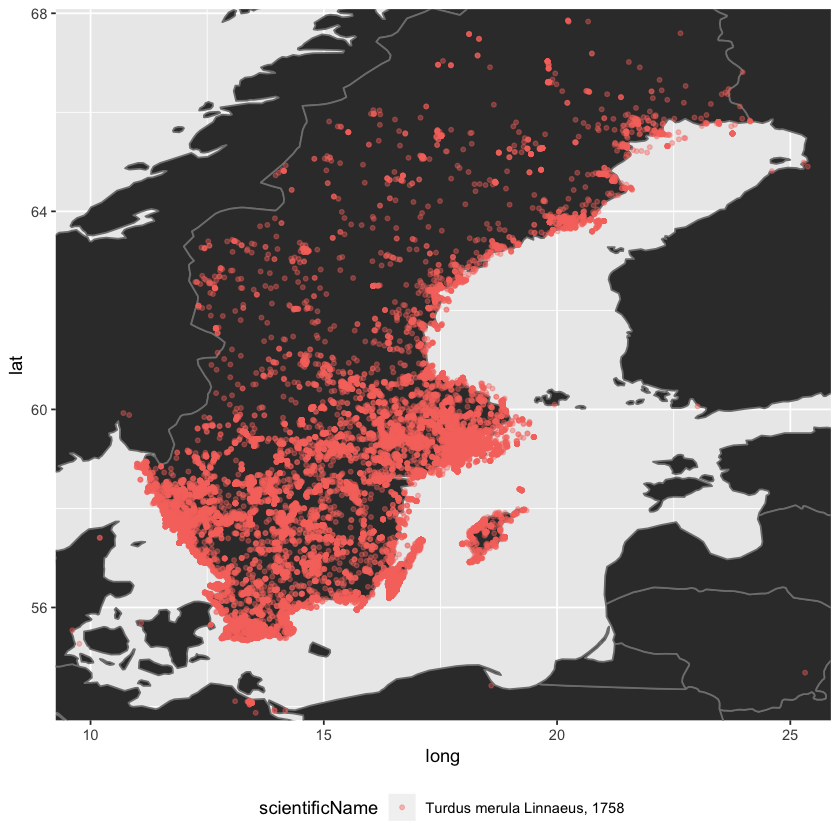

In [51]:
# these first two lines remove all rows that have NA data in the coordinates
doi_data=doi_data[!is.na(doi_data$decimalLatitude),]
doi_data = doi_data[!is.na(doi_data$decimalLongitude),]

# europe bounding box
#xmin = -11.425781
#xmax = 35.889050
#ymin = 31.464844
#ymax = 62.754726

lon = doi_data$decimalLongitude
lat = doi_data$decimalLatitude
locations = cbind(lon, lat)

locations_spatial <- SpatialPoints(locations)

ggplot() +
map_world +
geom_point(data = doi_data,  # Specify the data for geom_point()
             aes(x = decimalLongitude,  # Specify the x axis as longitude
                 y = decimalLatitude,
                 colour = scientificName),  # Colour the points based on species name
             alpha = 0.4,  # Set point opacity to 40%
             size = 1) +
coord_cartesian(xlim = c((xmin-buff),(xmax+buff)), ylim = c((ymin-buff),(ymax+buff))) +
theme(legend.position = "bottom")

### 9. Interactive mapping

Now we will plot occurrence data on an interactive OpenStreetView map. The advatage of this is that the user can zoom in and out of the plot and explore large geographic extends in very high detail. Additionally the meta-data of each point can be viewed by clicking on the data point on the map. Let's download a multi species dataset, in this case I'm using a genus ID (`genus_ID`), which we assigned earlier in this tutorial in order to get multiple species occurrences. After downloading the data, I select only the columns of interest (`selection`), to avoid displaying a lot of uninteresting meta data with each point.

In [290]:
genus_records = occ_search(taxonKey=genus_ID, return="data", hasCoordinate=TRUE, limit=1000,country = 'SE')
selection = genus_records[,c(1:4,71)]

For plotting interactively we will use the `map_leaflet()` function as part of the `mapr` package:

In [ ]:
library('mapr') # rOpenSci r-package for mapping (occurrence data)

map_leaflet(selection, "decimalLongitude", "decimalLatitude", size=5)

If you want to play around with different colors, there is a great package called `RColorBrewer`, which you can use to generate visually pleasing palettes of colors. You can check out the options you can choose from by using the help function `?colorRampPalette()`. Here we first determine the number of species in our data (in case we have several) and then parse it into the function to create a different color for each species.

In [ ]:
library('RColorBrewer')

n_spp <- length(unique(genus_records$name)) # number of unique taxa in dataframe (USE spp$name, NOT spp$taxonKey)
myColors <- colorRampPalette(brewer.pal(11,"Spectral"))(n_spp) # create color palette with [n_spp] colors


map_leaflet(selection, "decimalLongitude", "decimalLatitude", size=5, color=myColors)


![image](./map_leaflet.png)